In [678]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [679]:
def func(x,y):
    return 10*x**2+y**2

In [680]:
def grad(x,y):
    return np.array([20*x,2*y])

In [681]:
##x_i and y_i are arrays to store the values for plotting [i belongs to (1,5)]
r=np.array([17.,12.])
a=r
lr=1e-2
x_1=np.empty(1)
y_1=np.empty(1)
x_1[0]=a[0]
y_1[0]=a[1]
eps=0.0001
print(a)
print(x_1)
print(y_1)

[17. 12.]
[17.]
[12.]


## Vanilla SGD

In [682]:
for i in range(50):
    a=a-grad(a[0],a[1])*lr
    x_1=np.append(x_1,[a[0]])
    y_1=np.append(y_1,[a[1]])

[2.42632108e-04 4.37003616e+00]


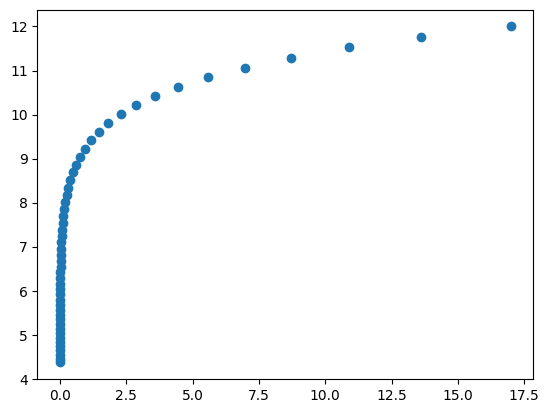

In [683]:
# print(x_1)
# print(y_1)
print(a)
plt.scatter(x_1,y_1)
plt.show()

## SGD with momentum

In [684]:
b=r
v_1=np.zeros(2)
rho=0.9
x_2=np.empty(1)
y_2=np.empty(1)
x_2[0]=b[0]
y_2[0]=b[1]
print(b)
print(x_2)
print(y_2)

[17. 12.]
[17.]
[12.]


In [685]:
for j in range(50):
    v_1=v_1*rho+grad(b[0],b[1])
    b=b-v_1*lr
    x_2=np.append(x_2,[b[0]])
    y_2=np.append(y_2,[b[1]])

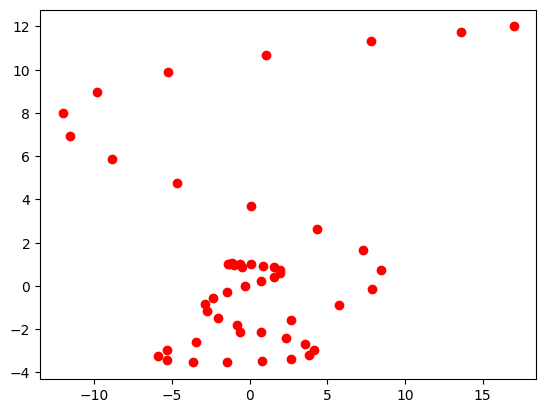

In [686]:
# print(x_2)
# print(y_2)
plt.scatter(x_2,y_2,c='r')
plt.show()

## Nesterov Momentum

In [687]:
c=r
v_2=np.zeros(2)
rho=0.9
proj=np.zeros(2)
x_3=np.empty(1)
y_3=np.empty(1)
x_3[0]=c[0]
y_3[0]=c[1]
print(c)
print(x_3)
print(y_3)
print(v_2)

[17. 12.]
[17.]
[12.]
[0. 0.]


In [688]:
for k in range(50):
    proj=c+rho*v_2
    v_2=rho*v_2-grad(proj[0],proj[1])*lr
    c=c+v_2
    x_3=np.append(x_3,[c[0]])
    y_3=np.append(y_3,[c[1]])

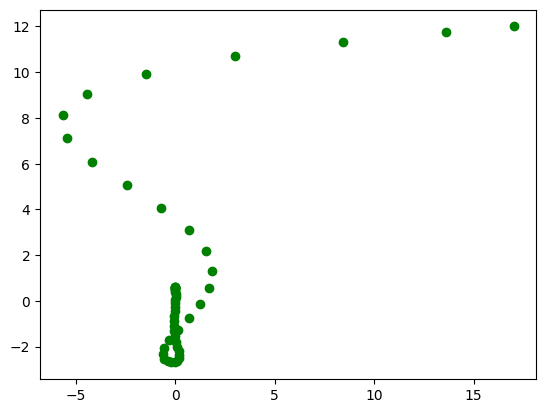

In [689]:
# print(x_3)
# print(y_3)
plt.scatter(x_3,y_3,c='g')
plt.show()

## Ada Grad

In [690]:
d=r
eps=1e-8
x_4=np.empty(1)
y_4=np.empty(1)
x_4[0]=d[0]
y_4[0]=d[1]
print(d)
print(x_4)
print(y_4)
grad_s=np.zeros(2)
print(grad_s)
new_lr=np.zeros(2)
print(new_lr)
lr_2=3

[17. 12.]
[17.]
[12.]
[0. 0.]
[0. 0.]


In [691]:
for l in range(50):
    grad_s+=grad(d[0],d[1])**2
    new_lr=lr_2/(np.sqrt(grad_s)+eps)
    d=d-new_lr*grad(d[0],d[1])
    x_4=np.append(x_4,d[0])
    y_4=np.append(y_4,d[1])

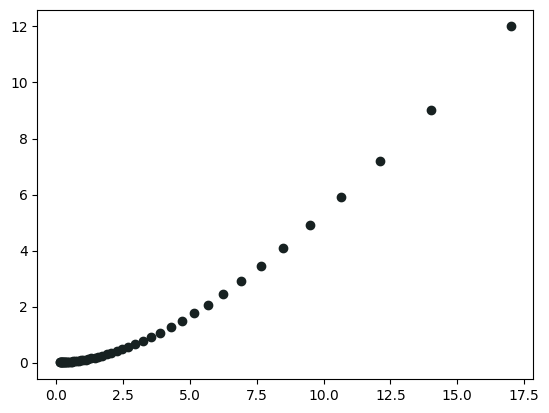

In [692]:
# print(x_4)
# print(y_4)
plt.scatter(x_4,y_4,c='#172121')
plt.show()

## RMS prop

In [693]:
e=r
eps=1e-8
x_5=np.empty(1)
y_5=np.empty(1)
x_5[0]=e[0]
y_5[0]=e[1]
print(e)
print(x_5)
print(y_5)
grad_s=np.zeros(2)
new_lr=np.zeros(2)
lr_3=0.7
rho=0.9

[17. 12.]
[17.]
[12.]


In [694]:
for m in range(50):
    grad_s=rho*grad_s +(1-rho)*((grad(e[0],e[1])**2))
    new_lr=lr_3/(np.sqrt(grad_s)+eps)
    e=e-new_lr*grad(e[0],e[1])
    x_5=np.append(x_5,e[0])
    y_5=np.append(y_5,e[1])

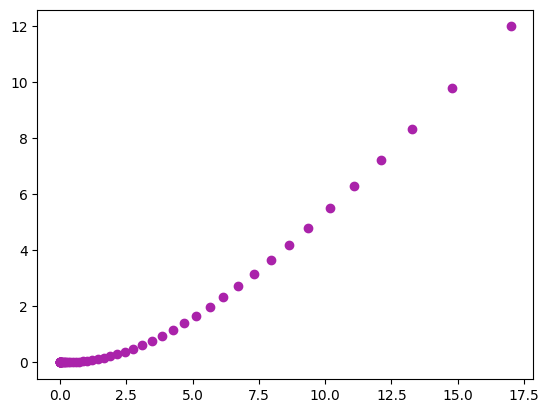

In [695]:
# print(x_5)
# print(y_5)
plt.scatter(x_5,y_5,c="#aa22aa")

## PLOTTING

MovieWriter ffmpeg unavailable; using Pillow instead.


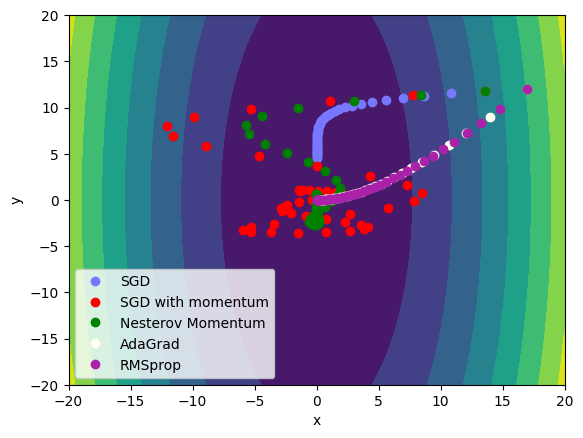

In [696]:
fig=plt.figure()
ax=plt.axes()


x=np.linspace(-20,20,100)
y=np.linspace(-20,20,100)
X,Y=np.meshgrid(x,y)
Z=func(X,Y)
ax.contourf(X,Y,Z)
ax.set_xlabel('x')
ax.set_ylabel('y')


line_sgd,=ax.plot(x_1[0],y_1[0],c='#7777ff',label='SGD',marker='o',linestyle='None')
line_sgdm,=ax.plot(x_2[0],y_2[0],c='red',label='SGD with momentum',marker='o',linestyle='None')
line_nm,=ax.plot(x_3[0],y_3[0],c='green',label='Nesterov Momentum',marker='o',linestyle='None')
line_ag,=ax.plot(x_4[0],y_4[0],c='#ffffee',label='AdaGrad',marker='o',linestyle='None')
line_rms,=ax.plot(x_5[0],y_5[0],c='#aa22aa',label='RMSprop',marker='o',linestyle='None')
lines=[line_sgd,line_sgdm,line_nm,line_ag,line_rms]
def update(i):
    line_sgd.set_data(x_1[:i],y_1[:i])
    line_sgdm.set_data(x_2[:i],y_2[:i])
    line_nm.set_data(x_3[:i],y_3[:i])
    line_ag.set_data(x_4[:i],y_4[:i])
    line_rms.set_data(x_5[:i],y_5[:i])
    plt.legend(loc=3)
gif = FuncAnimation(fig, update, 50, blit=False)
gif.save('output.gif')
plt.show()